# Imports

In [1]:
import sys,os
import numpy as np
import pylab as py
import pandas as pd

import matplotlib
matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
#matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
matplotlib.rc('text',usetex=True)
import pylab  as py

import mceg
from tools import load, save, checkdir,lprint

<ipython-input-1-30546e9c332a>:7: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  matplotlib.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]


## some auxiliary function

In [2]:
# Constants
Mp = 0.93827
Mpi = 0.1395

In [3]:
# Auxiliary function for histogram generation
def get_xy_steps(xbins,yvalues):
    X,Y=[],[]
    for i in range(len(xbins)-1):
        x1=xbins[i]
        x2=xbins[i+1]
        y=yvalues[i]            
        X.append(x1)
        Y.append(y)
        X.append(x2)
        Y.append(y)
    return np.array(X),np.array(Y) 

In [4]:
# Auxiliary functions for manipulation of arrays of 4-vectors
def dot(A,B):
    return A[0]*B[0] - A[1]*B[1] - A[2]*B[2] - A[3]*B[3]

def add(A,B):
    ApB={}
    ApB[0]=A[0]+B[0] 
    ApB[1]=A[1]+B[1] 
    ApB[2]=A[2]+B[2] 
    ApB[3]=A[3]+B[3] 
    return ApB

def sub(A,B):
    AmB={}
    AmB[0]=A[0]-B[0] 
    AmB[1]=A[1]-B[1] 
    AmB[2]=A[2]-B[2] 
    AmB[3]=A[3]-B[3] 
    return AmB

## generate events from MC event generator (MCEG) for the reaction

$\gamma+p\to p+\pi^+ +X$


In [5]:
nsamples=10000
samples=mceg.gen_samples(nsamples)
samples.shape

(10000, 14)

In [6]:
pd.DataFrame(samples)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.041087,3.686284,0.565257,-0.610892,0.045634,-0.448594,0.554557,-0.105963,0.755231,1.139196,1.791857,1.404093,1.413489,1.800978
1,0.067479,3.757295,-0.099157,-0.099153,0.198310,-0.335434,0.222923,0.112511,0.444369,0.012239,3.300687,1.095519,0.281311,3.311492
2,0.098413,3.134529,0.552820,-0.485565,-0.067255,-0.058433,-0.025355,0.083788,0.638658,0.299807,2.196064,1.263827,0.588014,2.203111
3,0.009387,3.188593,-0.561162,0.399459,0.161703,-0.200197,0.013653,0.186544,0.402279,0.555997,2.230317,1.182015,0.698818,2.248270
4,0.061053,3.006558,-0.145337,-0.243472,0.388809,-0.039592,0.235934,-0.196342,0.321153,0.223379,2.462026,1.003085,0.429304,2.504147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-0.000845,3.716195,-0.152024,-0.173243,0.325267,0.516087,-0.005452,-0.510635,0.305559,0.381459,3.029178,1.123910,0.441603,3.092236
9996,0.169692,3.030553,-0.200613,0.272905,-0.072292,-0.055336,-0.034292,0.089628,0.295435,0.149717,2.585401,1.005455,0.342824,2.591721
9997,0.087187,3.644957,-0.495590,0.019922,0.475667,-0.193919,0.222325,-0.028406,0.300914,0.504859,2.839184,1.119872,0.569358,2.882272
9998,0.155641,3.278242,0.429344,-0.439610,0.010266,0.542835,-0.208442,-0.334394,0.583602,0.783270,1.911370,1.303821,0.932565,1.945436


## lets  build the $\pi^+ \pi^-$ invariant mass distribution

In [7]:
# get pi+ 4-momentum

pip={}  
pip[0]=samples[:,12]
pip[1]=samples[:,3]
pip[2]=samples[:,6]
pip[3]=samples[:,9]

# get pi- 4-momentum

pim={}  
pim[0]=samples[:,13]
pim[1]=samples[:,4]
pim[2]=samples[:,7]
pim[3]=samples[:,10]

# add pim and pip 4-vectors (eventwise)
pipPpim=add(pim,pip)

# compute the pi+pi- invariant mass (eventwise)
Mpipi=np.sqrt(dot(pipPpim,pipPpim))
Mpipi.shape


(10000,)

## Lets look at the $M_{\pi\pi}$ distribution 

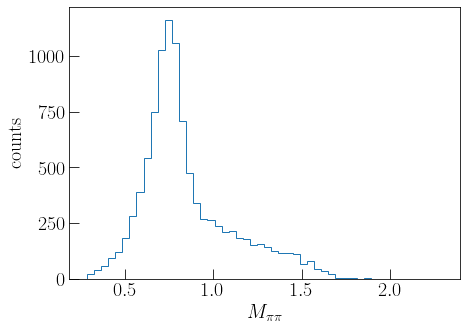

In [8]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*7,nrows*5))
ax=py.subplot(nrows,ncols,1)

ax.hist(Mpipi,histtype='step',bins=50);

ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)
ax.set_xlabel(r'$M_{\pi\pi}$',size=20);
ax.set_ylabel(r'$\rm counts$',size=20);



## lets build normalized data with statistical uncertainties

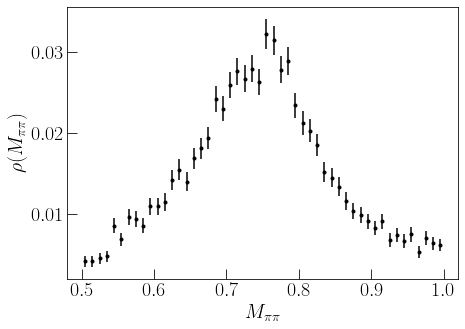

In [9]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*7,nrows*5))
ax=py.subplot(nrows,ncols,1)

#H,E=np.histogram(Mpipi,range=(0.5,1.5),bins=50)
H,E=np.histogram(Mpipi,range=(0.5,1.0),bins=50)


m=0.5*(E[1:]+E[:-1])
rho =H/np.sum(nsamples)
drho=np.sqrt(H)/np.sum(nsamples)

ax.errorbar(m,rho,drho,fmt='k.')

ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)
ax.set_xlabel(r'$M_{\pi\pi}$',size=20);
ax.set_ylabel(r'$\rho(M_{\pi\pi})$',size=20);



In [10]:
pd.DataFrame({'m':m,'rho':rho,'drho':drho})[:10]

,m,rho,drho
0,0.505,0.0042,0.000648
1,0.515,0.0042,0.000648
2,0.525,0.0046,0.000678
3,0.535,0.0048,0.000693
4,0.545,0.0086,0.000927
5,0.555,0.0069,0.000831
6,0.565,0.0097,0.000985
7,0.575,0.0094,0.000970
8,0.585,0.0086,0.000927
9,0.595,0.0110,0.001049


## lets fit the data to a physical model 

${\rm Model(m,s;A,B,C,\Gamma)} = \frac{A}{(m^2-s)^2+(m\Gamma)^2} + Bs +C$ 




To fit the model we use lestsq routine from scipy

In [14]:
from scipy.optimize  import leastsq

Lets make a fit

In [16]:
def model(m,params):
    A,B,C,G,s=params
    return A / ((m**2 - s)**2 + (m*G)**2 ) + B*s + C

def residuals(params):
    return (rho-model(m,params))/drho

fit=leastsq(residuals,[1,1,1,1,1],full_output = 1)[0]



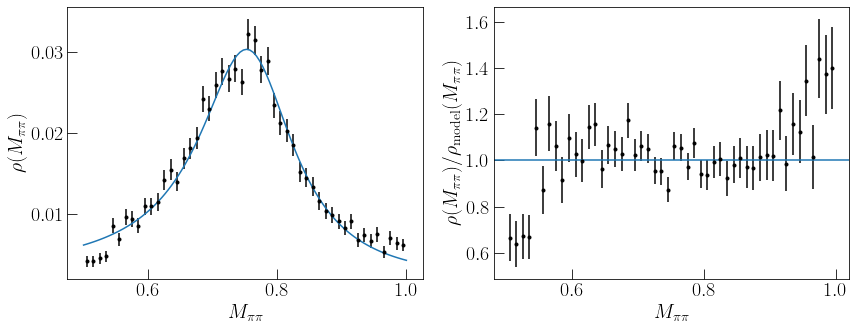

In [17]:
nrows,ncols=1,2
fig = py.figure(figsize=(ncols*7,nrows*5))

ax=py.subplot(nrows,ncols,1)
ax.errorbar(m,rho,drho,fmt='k.')
M=np.linspace(0.5,1.,100)
ax.plot(M,model(M,fit))
ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)
ax.set_xlabel(r'$M_{\pi\pi}$',size=20);
ax.set_ylabel(r'$\rho(M_{\pi\pi})$',size=20);


ax=py.subplot(nrows,ncols,2)

rho_model=model(m,fit)
ax.errorbar(m,rho/rho_model,drho/rho_model,fmt='k.')
ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)
ax.set_xlabel(r'$M_{\pi\pi}$',size=20);
ax.set_ylabel(r'$\rho(M_{\pi\pi})/\rho_{\rm model}(M_{\pi\pi})$',size=20);
ax.axhline(1)



## Uncertainty quantification

In [73]:
replicas=[]
for irep in range(200):
    rho_k=rho+(drho)*np.random.randn(len(rho))

    def residuals(params):
        return (rho_k-model(m,params))/drho

    fit=leastsq(residuals,[1,1,1,1,1],full_output = 1)[0]
    replicas.append(fit)
replicas=np.array(replicas)

In [74]:
replicas.shape

(200, 5)

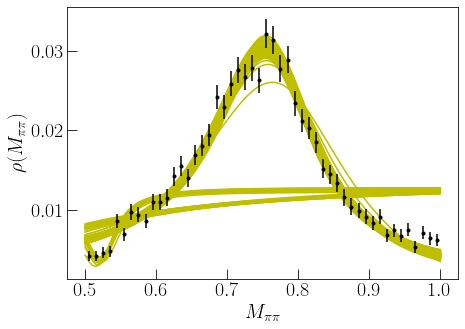

In [75]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*7,nrows*5))

ax=py.subplot(nrows,ncols,1)
ax.errorbar(m,rho,drho,fmt='k.',zorder=10)

M=np.linspace(0.5,1.,100)

for fit in replicas:
    ax.plot(M,model(M,fit),color='y')
ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)
ax.set_xlabel(r'$M_{\pi\pi}$',size=20);
ax.set_ylabel(r'$\rho(M_{\pi\pi})$',size=20);


ok some of the fits failed, lets filter them out

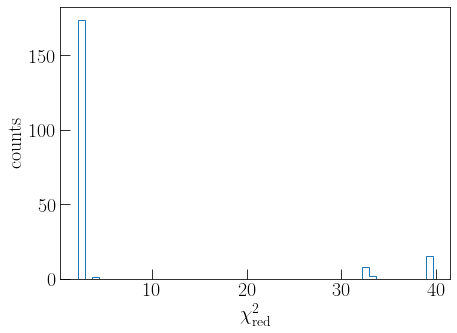

In [76]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*7,nrows*5))
ax=py.subplot(nrows,ncols,1)


def get_redu_chi2(params):
    res=(rho-model(m,params))/drho
    redu_chi2=np.sum(res**2)/len(res)
    return redu_chi2
    
redu_chi2=np.array([get_redu_chi2(fit) for fit in replicas ])
ax.hist(redu_chi2,histtype='step',bins=50);

ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)
ax.set_xlabel(r'$\chi^2_{\rm red}$',size=20);
ax.set_ylabel(r'$\rm counts$',size=20);


In [77]:
replicas=replicas[redu_chi2<10]
replicas.shape

(175, 5)

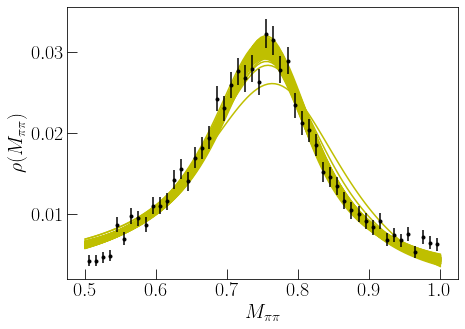

In [78]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*7,nrows*5))

ax=py.subplot(nrows,ncols,1)
ax.errorbar(m,rho,drho,fmt='k.',zorder=10)

M=np.linspace(0.5,1.,100)

for fit in replicas:
    ax.plot(M,model(M,fit),color='y')
ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)
ax.set_xlabel(r'$M_{\pi\pi}$',size=20);
ax.set_ylabel(r'$\rho(M_{\pi\pi})$',size=20);



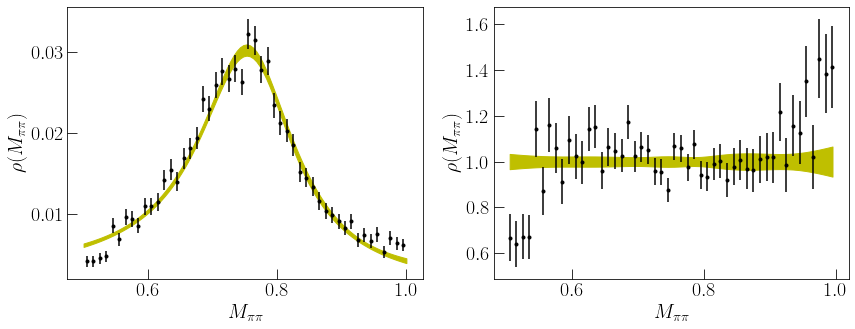

In [79]:
nrows,ncols=1,2
fig = py.figure(figsize=(ncols*7,nrows*5))


ax=py.subplot(nrows,ncols,1)
ax.errorbar(m,rho,drho,fmt='k.',zorder=10)
M=np.linspace(0.5,1.,100)
rho_model=[model(M,fit) for fit in replicas]
rho_model_mean=np.mean(rho_model,axis=0)
rho_model_std=np.std(rho_model,axis=0)
down=rho_model_mean-rho_model_std
up  =rho_model_mean+rho_model_std
ax.fill_between(M,down,up,color='y')
ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)
ax.set_xlabel(r'$M_{\pi\pi}$',size=20);
ax.set_ylabel(r'$\rho(M_{\pi\pi})$',size=20);


ax=py.subplot(nrows,ncols,2)

rho_model=[model(m,fit) for fit in replicas]
rho_model_mean=np.mean(rho_model,axis=0)
rho_model_std=np.std(rho_model,axis=0)
down=rho_model_mean-rho_model_std
up  =rho_model_mean+rho_model_std

ax.errorbar(m,rho/rho_model_mean,drho/rho_model_mean,fmt='k.',zorder=10)
ax.fill_between(m,down/rho_model_mean,up/rho_model_mean,color='y')
ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)
ax.set_xlabel(r'$M_{\pi\pi}$',size=20);
ax.set_ylabel(r'$\rho(M_{\pi\pi})$',size=20);






## parameter space 

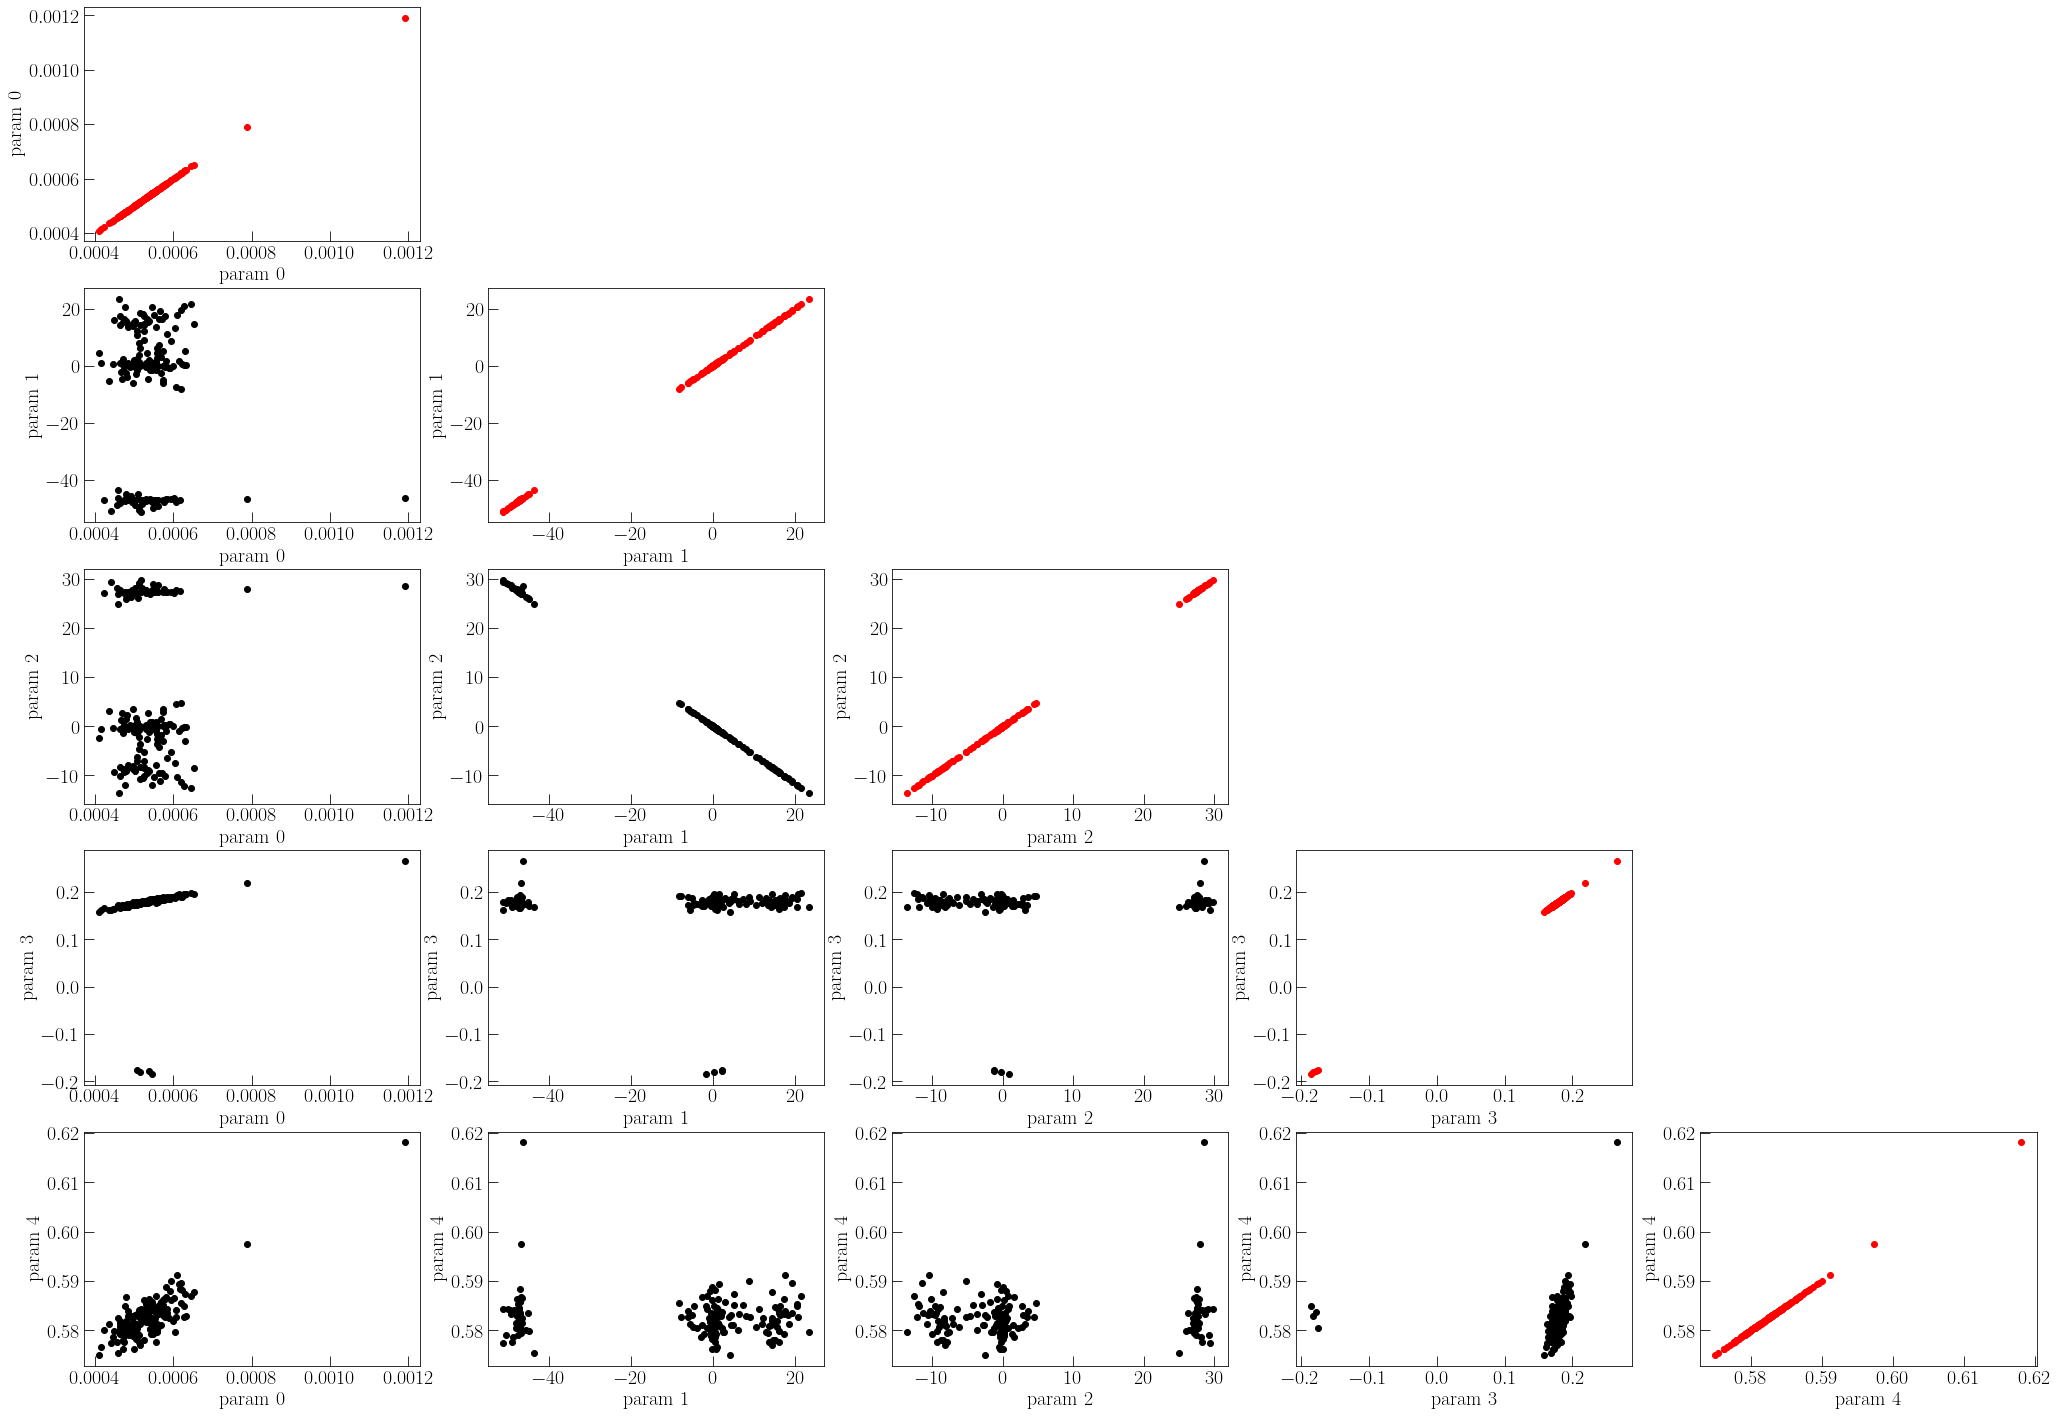

In [82]:
nrows,ncols=5,5
fig = py.figure(figsize=(ncols*7,nrows*5))
cnt=0
for i in range(5):
    for j in range(5):
        if j>i:
            cnt+=5-j
            break
        cnt+=1
        #print(i,j,cnt)
        ax=py.subplot(nrows,ncols,cnt)
        if i==j: color='r'
        else: color='k'
        ax.plot(replicas[:,j],replicas[:,i],ls='',marker='o',color=color)
        ax.set_xlabel(r'$\rm param~{%d}$'%j,size=20);
        ax.set_ylabel(r'$\rm param~{%d}$'%i,size=20);
        ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)


# TO DO:

- implement GAN based fitting strategy 
- implement inverse mappers strategy 

## Inverse Mappers

In [113]:
replicas.shape

hyperbox=[]
for i in range(replicas.shape[1]):
    pmin=np.amin(replicas[:,i])
    pmax=np.amax(replicas[:,i])
    hyperbox.append(np.random.uniform(pmin,pmax,10000))
hyperbox=np.array(hyperbox).T
hyperbox.shape

(10000, 5)

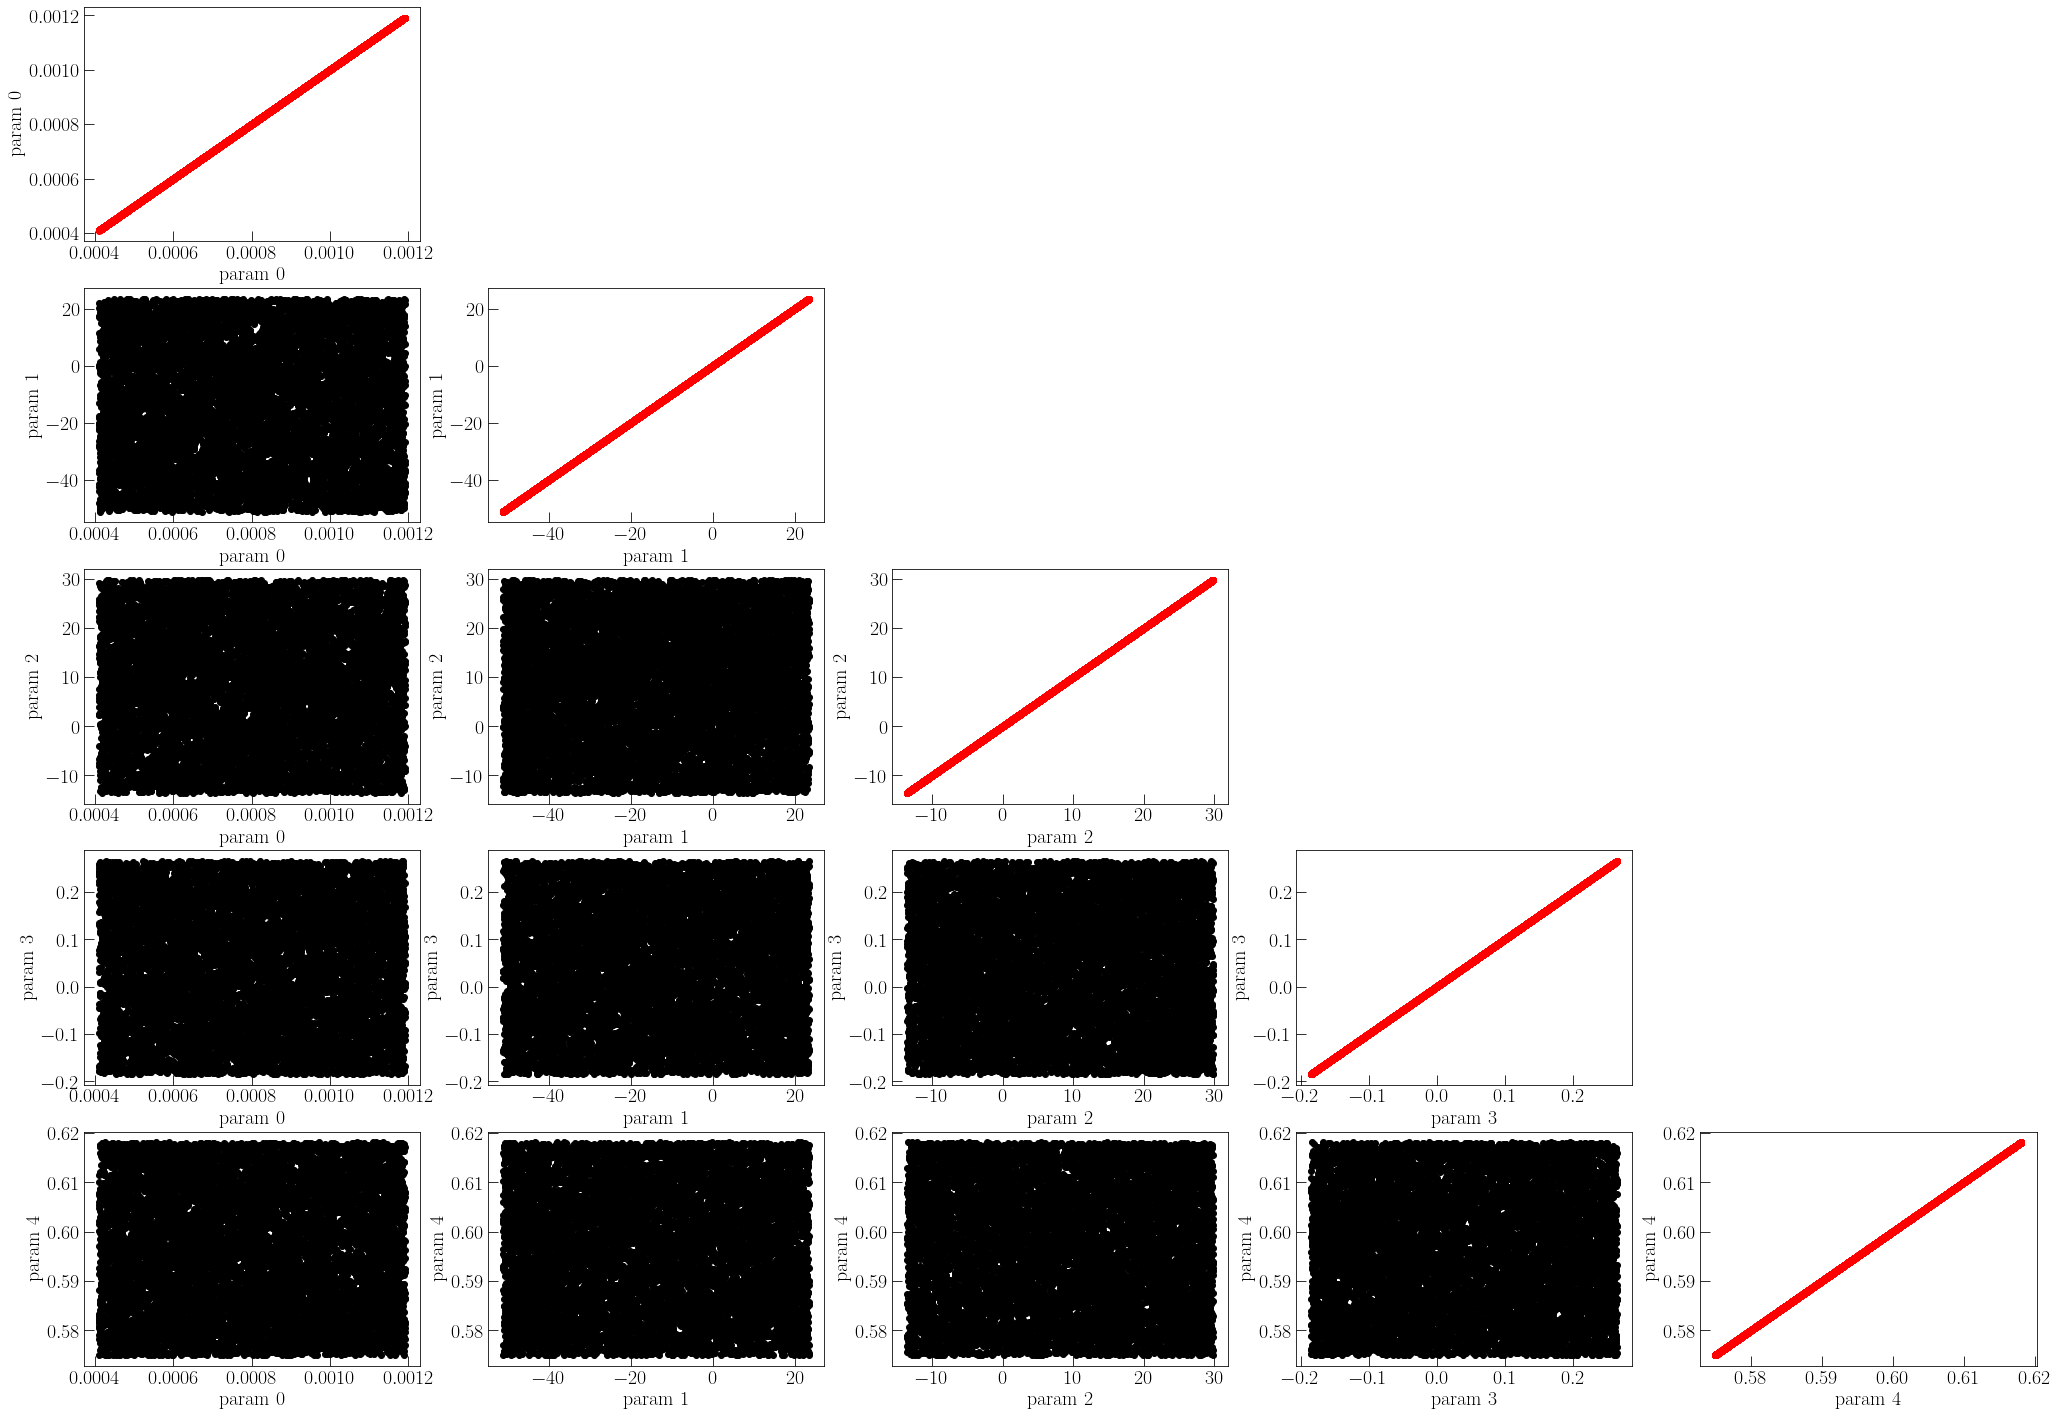

In [114]:
nrows,ncols=5,5
fig = py.figure(figsize=(ncols*7,nrows*5))
cnt=0
for i in range(5):
    for j in range(5):
        if j>i:
            cnt+=5-j
            break
        cnt+=1
        #print(i,j,cnt)
        ax=py.subplot(nrows,ncols,cnt)
        if i==j: color='r'
        else: color='k'
        ax.plot(hyperbox[:,j],hyperbox[:,i],ls='',marker='o',color=color)
        ax.set_xlabel(r'$\rm param~{%d}$'%j,size=20);
        ax.set_ylabel(r'$\rm param~{%d}$'%i,size=20);
        ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)

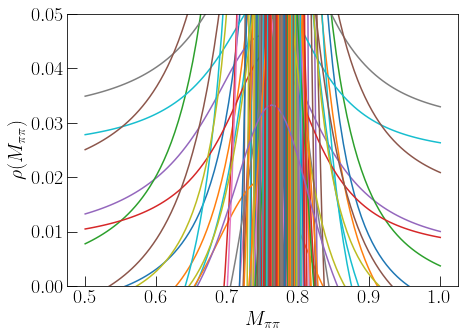

In [115]:
nrows,ncols=1,1
fig = py.figure(figsize=(ncols*7,nrows*5))

ax=py.subplot(nrows,ncols,1)
#ax.errorbar(m,rho,drho,fmt='k.',zorder=10)

M=np.linspace(0.5,1.,100)

for fit in hyperbox:
    ax.plot(M,model(M,fit))#,color='y')
ax.set_ylim(0,0.05)
ax.tick_params(axis='both', which='both',labelsize=20,direction='in',length=10)
ax.set_xlabel(r'$M_{\pi\pi}$',size=20);
ax.set_ylabel(r'$\rho(M_{\pi\pi})$',size=20);